# Pratikum Preprocessing Data
## Nama        : Deasyana Prakasi
## Nim         : 09011282328050
## Kelas       : SK3B
## Mata Kuliah : Data Mining

In [1049]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [1051]:
file_path = r'C:\Users\User\Downloads\archive\heart_disease_uci.csv'
df = pd.read_csv(file_path)

In [1053]:
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [1055]:
df.tail(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [1057]:
df.shape

(920, 16)

In [1059]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [1061]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [1063]:
df.duplicated().sum()

0

In [1065]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [1067]:
df = df.drop(columns=['id'], errors='ignore')
df.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [1069]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [1071]:
# Mengisi nilai missing value dengan mean
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())
# Mengisi nilai missing value dengan nilai mode
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [1073]:
pd.set_option('mode.chained_assignment', None)
obj_sex = {
    'Male': 0,
    'Female': 1
}

df['sex'] = df['sex'].replace(obj_sex)

# Konversi kolom 'fbs' dan 'exang' ke tipe boolean
df['fbs'] = df['fbs'].astype(bool)
df['exang'] = df['exang'].astype(bool)

# Konversi kolom boolean ke numerik
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# Konversi kolom 'sex' ke numerik
df['sex'] = df['sex'].astype(int)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,Cleveland,typical angina,145.000000,233.0,1,lv hypertrophy,150.000000,0,2.300000,downsloping,0.000000,fixed defect,0
1,67,0,Cleveland,asymptomatic,160.000000,286.0,0,lv hypertrophy,108.000000,1,1.500000,flat,3.000000,normal,2
2,67,0,Cleveland,asymptomatic,120.000000,229.0,0,lv hypertrophy,129.000000,1,2.600000,flat,2.000000,reversable defect,1
3,37,0,Cleveland,non-anginal,130.000000,250.0,0,normal,187.000000,0,3.500000,downsloping,0.000000,normal,0
4,41,1,Cleveland,atypical angina,130.000000,204.0,0,lv hypertrophy,172.000000,0,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,1,VA Long Beach,asymptomatic,127.000000,333.0,1,st-t abnormality,154.000000,0,0.000000,flat,0.676375,normal,1
916,62,0,VA Long Beach,typical angina,132.132404,139.0,0,st-t abnormality,137.545665,0,0.878788,flat,0.676375,normal,0
917,55,0,VA Long Beach,asymptomatic,122.000000,223.0,1,st-t abnormality,100.000000,0,0.000000,flat,0.676375,fixed defect,2
918,58,0,VA Long Beach,asymptomatic,132.132404,385.0,1,lv hypertrophy,137.545665,0,0.878788,flat,0.676375,normal,0


In [1075]:
scaler = StandardScaler()

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,Cleveland,typical angina,0.698041,0.311021,1,lv hypertrophy,0.495698,0,1.349421,downsloping,-1.249371e+00,fixed defect,0
1,67,0,Cleveland,asymptomatic,1.511761,0.797713,0,lv hypertrophy,-1.175955,1,0.589832,flat,4.292099e+00,normal,2
2,67,0,Cleveland,asymptomatic,-0.658158,0.274289,0,lv hypertrophy,-0.340128,1,1.634267,flat,2.444942e+00,reversable defect,1
3,37,0,Cleveland,non-anginal,-0.115679,0.467130,0,normal,1.968345,0,2.488805,downsloping,-1.249371e+00,normal,0
4,41,1,Cleveland,atypical angina,-0.115679,0.044717,0,lv hypertrophy,1.371326,0,0.494884,upsloping,-1.249371e+00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,1,VA Long Beach,asymptomatic,-0.278423,1.229308,1,st-t abnormality,0.654903,0,-0.834397,flat,-2.050756e-16,normal,1
916,62,0,VA Long Beach,typical angina,0.000000,-0.552169,0,st-t abnormality,0.000000,0,0.000000,flat,-2.050756e-16,normal,0
917,55,0,VA Long Beach,asymptomatic,-0.549662,0.219192,1,st-t abnormality,-1.494365,0,-0.834397,flat,-2.050756e-16,fixed defect,2
918,58,0,VA Long Beach,asymptomatic,0.000000,1.706817,1,lv hypertrophy,0.000000,0,0.000000,flat,-2.050756e-16,normal,0


In [1077]:
# Cek outliers 
numeric_df= df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print(outliers)

age           0
sex         194
trestbps     28
chol        185
fbs         228
thalch        2
exang         0
oldpeak      16
ca          309
num           0
dtype: int64


In [1079]:
def fill_outliers(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Hanya proses kolom numerik
            Q1 = df[col].quantile(0.25)  # Kuartil pertama
            Q3 = df[col].quantile(0.75)  # Kuartil ketiga
            IQR = Q3 - Q1  # Rentang antar kuartil

            lower_bound = Q1 - 1.5 * IQR  # Batas bawah
            upper_bound = Q3 + 1.5 * IQR  # Batas atas

            # Mengisi outlier dengan nilai batas
            df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

numeric_columns = df.select_dtypes(include=['number']).columns
df = fill_outliers(df, numeric_columns)


In [1081]:
# Cek outliers 
numeric_df= df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print(outliers)

age         0
sex         0
trestbps    0
chol        0
fbs         0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64


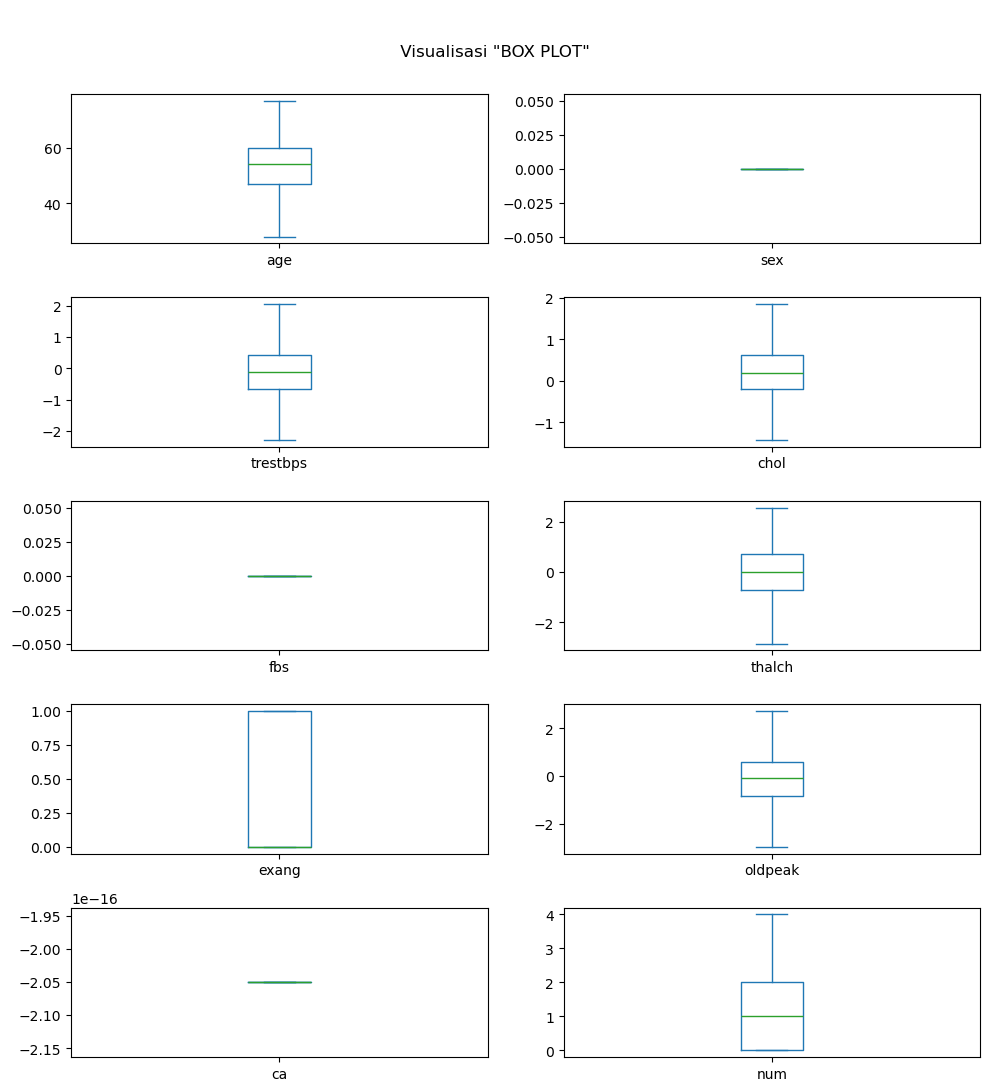

In [1083]:
# Visualisasi Box Plot
df.plot(kind='box', subplots=True, layout=(len(df.columns)//2, 2), figsize=(10, 15))
plt.tight_layout()
plt.suptitle('\n \n Visualisasi "BOX PLOT" \n \n', fontsize=12)
plt.tight_layout()
plt.show()

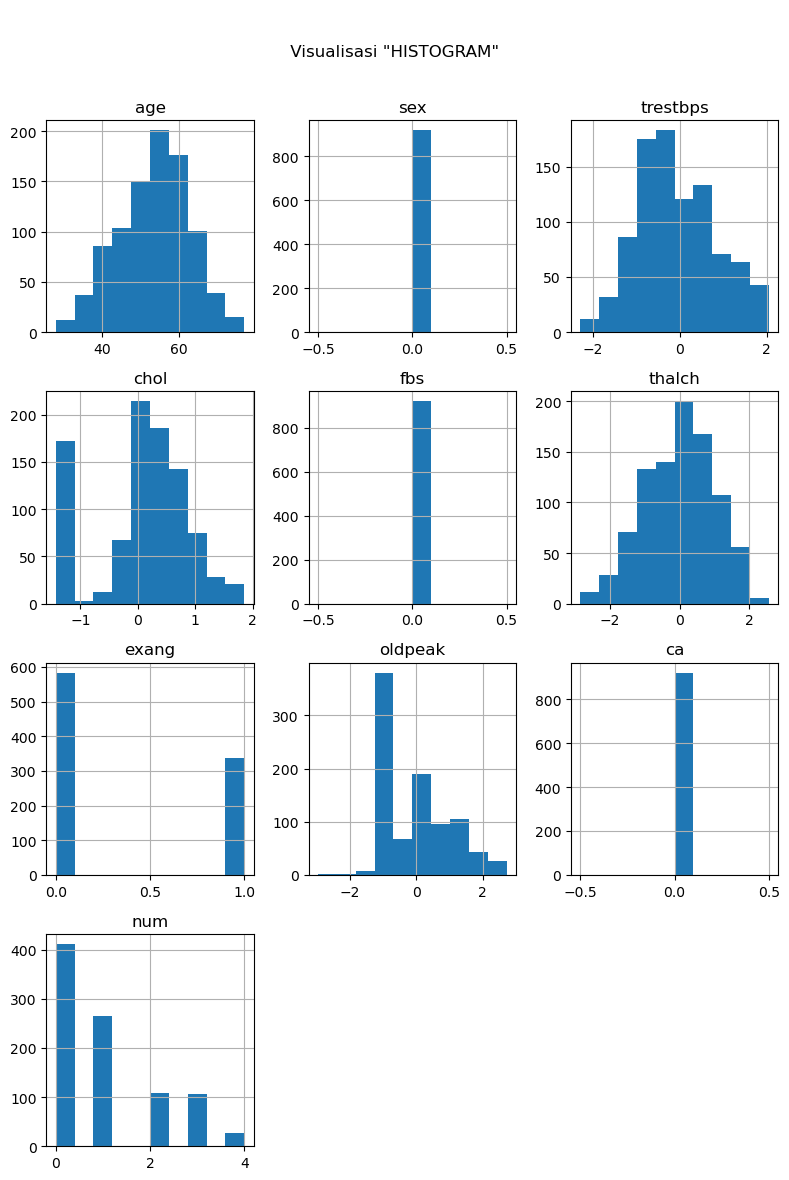

In [1044]:
# Visualisasi Histogram
df.hist(figsize=(8, 12))
plt.tight_layout()
plt.suptitle('\n \n Visualisasi "HISTOGRAM" \n \n', fontsize=12)
plt.tight_layout()
plt.show()